In [1]:
import pandas as pd
import pickle
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
import numpy as np
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessMonthBegin
import datetime
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from pprint import pprint
plt.style.use('fivethirtyeight')

In [2]:
rider_df = pd.read_csv('bike_return_features.csv')

In [3]:
features = rider_df.loc[:,['end_lat', 'end_lng', 'hour', 'dayofyear','dayofweek', 'month','year',
                            'bus_dist', 'subway_dist',
                            'Population_density','Residential', 'Health Services', 'Public Safety', 'Water',
                            'Miscellaneous', 'Education Facility', 'Cultural Facility',
                            'Recreational Facility', 'Social Services', 'Transportation Facility',
                            'Commercial', 'Government Facility', 'Religious Institution','Shape_Leng','TMP','wind_speed','precipitation']]

In [ ]:
features = rider_df.loc[:,['end_lat', 'end_lng', 'hour', 'dayofyear','dayofweek', 'month','year',
                            'bus_dist', 'subway_dist',
                            'Population_density','Residential', 'Health Services', 'Public Safety', 'Water',
                            'Miscellaneous', 'Education Facility', 'Cultural Facility',
                            'Recreational Facility', 'Social Services', 'Transportation Facility',
                            'Commercial', 'Government Facility', 'Religious Institution','Shape_Leng','TMP','wind_speed','precipitation']]

In [4]:
features.sort_index()

,end_lat,end_lng,hour,dayofyear,dayofweek,month,year,bus_dist,subway_dist,Population_density,...,Recreational Facility,Social Services,Transportation Facility,Commercial,Government Facility,Religious Institution,Shape_Leng,TMP,wind_speed,precipitation
0,40.635679,-74.020005,0,182,3,7,2021,349.988075,345.111862,20495.098201,...,4.0,1.0,5.0,4.0,16.0,7.0,18995.704026,35.0,17.325,0.0
1,40.635679,-74.020005,0,182,3,7,2021,349.988075,345.111862,20495.098201,...,4.0,1.0,5.0,4.0,16.0,7.0,18995.704026,35.0,13.950,0.0
2,40.635679,-74.020005,0,182,3,7,2021,349.988075,345.111862,20495.098201,...,4.0,1.0,5.0,4.0,16.0,7.0,18995.704026,34.0,19.800,0.0
3,40.635679,-74.020005,0,182,3,7,2021,349.988075,345.111862,20495.098201,...,4.0,1.0,5.0,4.0,16.0,7.0,18995.704026,31.1,22.050,1.0
4,40.635679,-74.020005,0,182,3,7,2021,349.988075,345.111862,20495.098201,...,4.0,1.0,5.0,4.0,16.0,7.0,18995.704026,30.0,24.300,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8984282,40.757241,-73.973157,8,356,2,12,2021,273.994053,203.131784,26032.468848,...,47.0,2.0,3.0,4.0,4.0,3.0,8158.105960,5.6,6.975,0.0
8984283,40.766368,-73.971518,8,356,2,12,2021,382.204905,240.327430,6.527246,...,2.0,5.0,28.0,4.0,42.0,26.0,16642.782287,5.6,10.350,0.0
8984284,40.766368,-73.971518,8,356,2,12,2021,382.204905,240.327430,6.527246,...,2.0,5.0,28.0,4.0,42.0,26.0,16642.782287,5.6,6.975,0.0
8984285,40.786259,-73.945526,8,356,2,12,2021,104.920108,254.316733,33750.611630,...,6.0,3.0,13.0,5.0,6.0,13.0,10835.378850,5.6,10.350,0.0


In [5]:
target = rider_df['rider_return']

In [6]:
features['month'] = features['month'].astype('int')

In [7]:
X_train, X_test, y_train, y_test = train_test_split(features, target, train_size=0.7, random_state=1)

In [8]:
# 构建测试集与训练集
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [9]:
#take 12mins
clf = RandomForestRegressor(n_estimators=10, max_depth=None, min_samples_split=5, min_samples_leaf=4, random_state=1)
clf.fit(X_train, y_train)
predictions_train = clf.predict(X_train)
predictions_test = clf.predict(X_test)

In [13]:
mae_train = mean_absolute_error(y_train, predictions_train)
mae_test = mean_absolute_error(y_test, predictions_test)
r2_train = r2_score(y_train, predictions_train)
r2_test = r2_score(y_test, predictions_test)
print(f"Train MAE for decision tree:{mae_train}")
print(f"Test MAE for decision tree:{mae_test}")
print(f"Train r2 score for decision tree:{r2_train}")
print(f"Test r2 score for decision tree:{r2_test}")

Train MAE for decision tree:1.110523068515406
Test MAE for decision tree:1.5856468083601176
Train r2 score for decision tree:0.9233189189808917
Test r2 score for decision tree:0.846843130194989


In [14]:
mse_train = mean_squared_error(y_train, predictions_train)
mse_train

3.8722776973139967

In [15]:
rmse_train = np.sqrt(mse_train)
rmse_train

1.9678103814427845

In [16]:
mse_test = mean_squared_error(y_test, predictions_test)
mse_test

7.7616200319737265

In [17]:
rmse_test = np.sqrt(mse_test)
rmse_test

2.785968419055343

In [11]:
def plot_feature_importance(importance,names,model_type):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')
    plt.show()

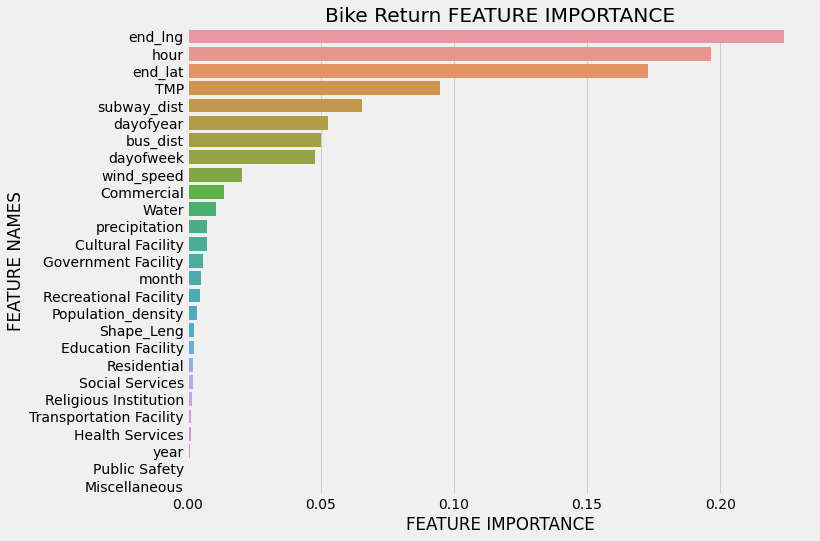

In [21]:
plot_feature_importance(clf.feature_importances_,X_train.columns,'Bike Return ')

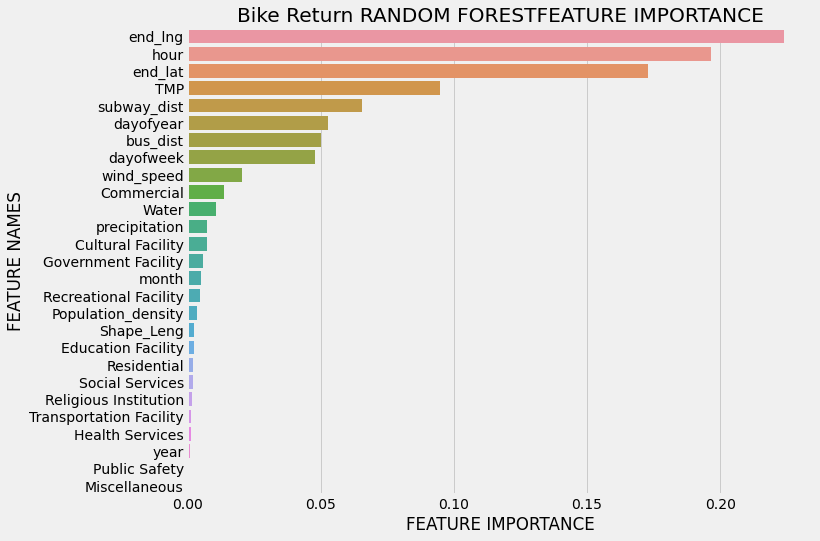

In [20]:
plot_feature_importance(clf.feature_importances_,X_train.columns,'Bike Return RANDOM FOREST')